Ahmed Baari  
126156004

### Importing the Data

In [ ]:
!wget www.robots.ox.ac.uk/~vgg/data/flowers/17/17flowers.tgz
!tar -xzf 17flowers.tgz

--2025-02-04 07:49:11--  http://www.robots.ox.ac.uk/~vgg/data/flowers/17/17flowers.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.robots.ox.ac.uk/~vgg/data/flowers/17/17flowers.tgz [following]
--2025-02-04 07:49:11--  https://www.robots.ox.ac.uk/~vgg/data/flowers/17/17flowers.tgz
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/flowers/17/17flowers.tgz [following]
--2025-02-04 07:49:11--  https://thor.robots.ox.ac.uk/flowers/17/17flowers.tgz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 602706

Importing necessary Libraries

In [13]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Load Dataset

In [ ]:
# Image size: 224, 224

# Data Generator
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Loading images
train_data = datagen.flow_from_directory(
    'jpg',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

### Pretrained Model

In [14]:
model = tf.keras.applications.VGG16(weights='imagenet', include_top=True)

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 24s 0us/step


In [ ]:
grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer('block5_conv3').output, model.output]
    )

grad_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

## GRADCam Implementation

In [ ]:
IMG_SIZE = 224
img_path = 'jpg/image_0001.jpg'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
img = tf.keras.preprocessing.image.img_to_array(img)
img = img / 255.

**Getting the gradient of the output with respect to the feature map**

In [ ]:
with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(np.array([img]))
        loss = predictions[:, np.argmax(predictions[0])]
grads = tape.gradient(loss, conv_outputs)[0]

grads[0].shape, conv_outputs[0].shape, predictions[0].shape

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_49']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


(TensorShape([14, 512]), TensorShape([14, 14, 512]), TensorShape([1000]))

**Global average pooling of the gradients**

In [ ]:
weights = tf.reduce_mean(grads, axis=(0, 1))
weights.shape

TensorShape([512])

**Weighted sum of the feature maps**

In [ ]:
cam = np.zeros(conv_outputs.shape[1:3], dtype=np.float32)
for i, w in enumerate(weights):
    cam += w * conv_outputs[0, :, :, i]

cam

<tf.Tensor: shape=(14, 14), dtype=float32, numpy=
array([[0.0011901 , 0.00124819, 0.00122567, 0.00137799, 0.00164024,
        0.00192771, 0.00184955, 0.00168595, 0.00147786, 0.00126929,
        0.00132396, 0.00136659, 0.0019668 , 0.00211229],
       [0.0011855 , 0.00117527, 0.00108928, 0.00127747, 0.00132061,
        0.00160844, 0.00156312, 0.00141534, 0.00139936, 0.00137796,
        0.00134931, 0.00154076, 0.00197692, 0.00214538],
       [0.00138258, 0.0014128 , 0.00151283, 0.00179473, 0.00182854,
        0.00169055, 0.00126212, 0.00078083, 0.00102399, 0.00121632,
        0.00140324, 0.00164757, 0.0021015 , 0.00242104],
       [0.00167436, 0.00164297, 0.00200894, 0.0019272 , 0.00153938,
        0.00108651, 0.00098795, 0.00084887, 0.00092395, 0.00109631,
        0.00128656, 0.00150861, 0.00194677, 0.0025634 ],
       [0.00169106, 0.00147994, 0.00184891, 0.00176564, 0.00118423,
        0.00075251, 0.00127354, 0.00135271, 0.00109882, 0.0009382 ,
        0.00098691, 0.00120857, 0.00157475

In [ ]:
# Apply ReLU and normalize
cam = np.maximum(cam, 0)
cam = cv2.resize(cam, (img.shape[1], img.shape[0]))
cam = cam / np.max(cam)

cam

array([[0.42740384, 0.42740384, 0.42740384, ..., 0.75859225, 0.75859225,
        0.75859225],
       [0.42740384, 0.42740384, 0.42740384, ..., 0.75859225, 0.75859225,
        0.75859225],
       [0.42740384, 0.42740384, 0.42740384, ..., 0.75859225, 0.75859225,
        0.75859225],
       ...,
       [0.7276896 , 0.7276896 , 0.7276896 , ..., 0.6494209 , 0.6494209 ,
        0.6494209 ],
       [0.7276896 , 0.7276896 , 0.7276896 , ..., 0.6494209 , 0.6494209 ,
        0.6494209 ],
       [0.7276896 , 0.7276896 , 0.7276896 , ..., 0.6494209 , 0.6494209 ,
        0.6494209 ]], dtype=float32)

#### Visualizing GRADCam Output

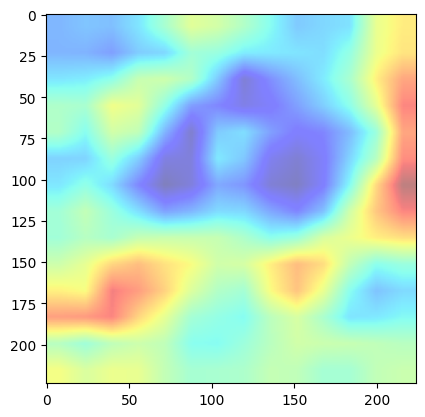

In [ ]:
#plt.imshow(img)
plt.imshow(cam, cmap='jet', alpha=0.5)
plt.show()

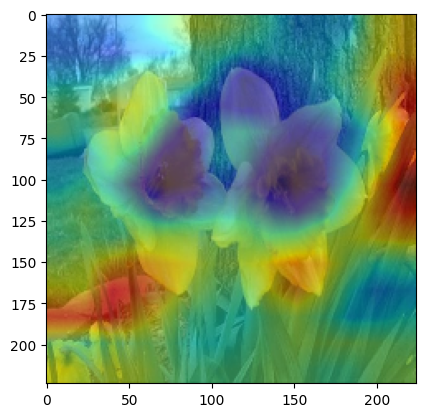

In [ ]:
plt.imshow(img)
plt.imshow(cam, cmap='jet', alpha=0.5)
plt.show()

**Now, I'm putting it all into a function, to run on all 14 types of flower images**

In [ ]:
def grad_cam(model, image, layer_name='block5_conv3'):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(np.array([image]))
        loss = predictions[:, np.argmax(predictions[0])]
    grads = tape.gradient(loss, conv_outputs)[0]

    weights = tf.reduce_mean(grads, axis=(0, 1))

    cam = np.zeros(conv_outputs.shape[1:3], dtype=np.float32)
    for i, w in enumerate(weights):
        cam += w * conv_outputs[0, :, :, i]

    cam = np.maximum(cam, 0)
    cam = cv2.resize(cam, (image.shape[1], image.shape[0]))
    cam = cam / np.max(cam)

    return cam

## GradCAM on the other types of flowers

In [ ]:
import os

In [ ]:
image_dir = 'jpg'
for filename in os.listdir(image_dir):
    if filename.endswith(".jpg"):
        # Our file
        img_path = os.path.join(image_dir, filename)
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
        img = tf.keras.preprocessing.image.img_to_array(img)
        img = img / 255.

        # Calling gradcam function
        cam = grad_cam(model, img)

        # Plot original Image
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(img)
        plt.title("Original Image")

        # Plot Gradcam map
        plt.subplot(1, 2, 2)
        plt.imshow(img)
        plt.imshow(cam, cmap='jet', alpha=0.5)
        plt.title("Grad-CAM")
        plt.show()

# Surrogate Explainer

### Import and Load Data

In [1]:
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


### Image Explainer

In [4]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 19.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=67dce5a0ebeeca2d263aec4d8bf9abbc6e7ece01d4b8253e446bf9b47c251b7b
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [5]:
import lime
from lime import lime_image

In [6]:
# Explainer
explainer = lime_image.LimeImageExplainer()

In [16]:
# Explain image
explanation = explainer.explain_instance(
    tf.image.resize(x_test[0], (224, 224)).numpy().astype('double'), # Resize image firts
    model.predict,
    top_labels=5,
    hide_color=0,
    num_samples=1000
)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/

In [17]:
from skimage.segmentation import mark_boundaries

### Mask the image

In [26]:
# Display explanation
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],
    positive_only=True,
    num_features=5,
    hide_rest=True
)

### Show the mask

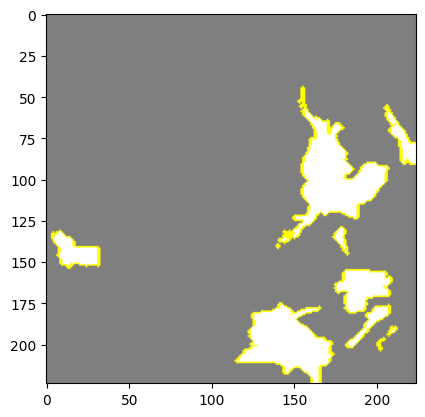

In [27]:
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

In [ ]:
# thank you!